# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based performing teh on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info
list_city = []
list_country = []
list_lat = []
list_long = []
list_temp = []
list_cloudiness = []
list_humidity = []
list_wind = []

counter = 0

In [5]:
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
    
        response = requests.get(url + city).json()
    
        list_city.append(response['name'])
        list_country.append(response['sys']['country'])
        list_lat.append(response['coord']['lat'])
        list_long.append(response['coord']['lon'])
        list_temp.append(response['main']['temp'])   
        list_humidity.append(response['main']['humidity'])  
        list_cloudiness.append(response['clouds']['all']) 
        list_wind.append(response['wind']['speed']) 
    
        print(f'getting city: {city}, count {counter}')
    
    except:
        print(f'{city} not found')
    
    counter += 1



getting city: busselton, count 0
getting city: the valley, count 1
getting city: bluff, count 2
getting city: ketchikan, count 3
getting city: arraial do cabo, count 4
getting city: cayenne, count 5
getting city: palu, count 6
getting city: hithadhoo, count 7
getting city: cap malheureux, count 8
getting city: rikitea, count 9
getting city: sao felix do xingu, count 10
getting city: nabire, count 11
getting city: hobart, count 12
getting city: anadyr, count 13
getting city: vaini, count 14
getting city: yulara, count 15
getting city: tuatapere, count 16
getting city: bambous virieux, count 17
getting city: yerbogachen, count 18
getting city: jamestown, count 19
getting city: baruun-urt, count 20
getting city: aloleng, count 21
getting city: ancud, count 22
palabuhanratu not found
getting city: punta arenas, count 24
getting city: yellowknife, count 25
getting city: agua verde, count 26
getting city: bengkulu, count 27
getting city: sabha, count 28
getting city: kahului, count 29
illoqq

getting city: chepareria, count 250
getting city: muravlenko, count 251
getting city: port-gentil, count 252
belushya guba not found
getting city: grindavik, count 254
getting city: linguere, count 255
getting city: rapid valley, count 256
getting city: oranjemund, count 257
getting city: butaritari, count 258
getting city: huarmey, count 259
getting city: suluq, count 260
getting city: andenes, count 261
getting city: boyuibe, count 262
getting city: clarksburg, count 263
getting city: half moon bay, count 264
getting city: calama, count 265
getting city: upata, count 266
getting city: guerrero negro, count 267
getting city: pemangkat, count 268
getting city: xucheng, count 269
getting city: pajan, count 270
getting city: angoche, count 271
getting city: carnarvon, count 272
getting city: tiksi, count 273
getting city: san cristobal, count 274
ozgon not found
getting city: port keats, count 276
getting city: douentza, count 277
getting city: tuktoyaktuk, count 278
getting city: fairba

getting city: udachnyy, count 498
getting city: waverley, count 499
getting city: baykit, count 500
getting city: neiafu, count 501
getting city: panzhihua, count 502
getting city: zhuhai, count 503
getting city: mao, count 504
getting city: sinjar, count 505
getting city: brae, count 506
getting city: russkaya polyana, count 507
getting city: smithers, count 508
getting city: sao miguel do araguaia, count 509
getting city: sayyan, count 510
el faiyum not found
getting city: lodwar, count 512
getting city: qaqortoq, count 513
getting city: bundaberg, count 514
getting city: palana, count 515
getting city: mayo, count 516
getting city: logansport, count 517
getting city: caravelas, count 518
getting city: camacupa, count 519
getting city: arteaga, count 520
ust-kamchatsk not found
getting city: huaidian, count 522
getting city: padang, count 523
sorvag not found
getting city: geraldton, count 525
getting city: santa marta, count 526
getting city: torbat-e jam, count 527
getting city: te

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data_df = pd.DataFrame({
    'City': list_city, 
    'Country': list_country, 
    'Lat': list_lat, 
    'Long': list_long, 
    'Temp': list_temp, 
    'Humidity': list_humidity, 
    'Cloudiness': list_cloudiness, 
    'Wind Speed': list_wind, 
    
})

In [7]:
weather_data_df.head()

,City,Country,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,-33.6500,115.3333,63.59,59,0,2.42
1,The Valley,AI,18.2170,-63.0578,82.26,76,18,13.27
2,Bluff,NZ,-46.6000,168.3333,53.80,62,15,19.30
3,Ketchikan,US,55.3422,-131.6461,55.87,94,75,12.66
4,Arraial do Cabo,BR,-22.9661,-42.0278,70.77,84,100,28.19


In [8]:
weather_data_df.to_csv('weather.csv', encoding='utf-8', index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

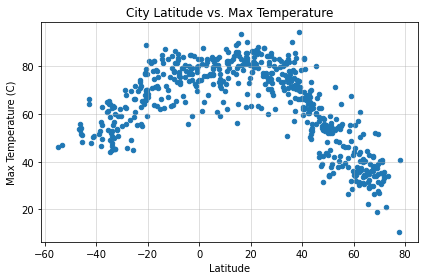

In [11]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Temp',
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')
plt.tight_layout()
plt.savefig('images/lat_vs_temp.png')
plt.show()

#This plot shows how temperature varies with distance from zero latitude.

## Latitude vs. Humidity Plot

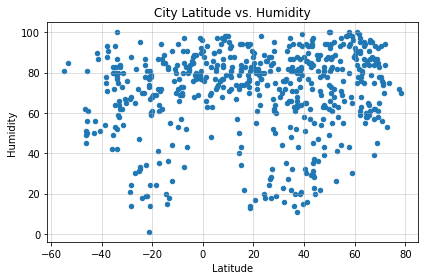

In [12]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Humidity',
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.tight_layout()
plt.savefig('images/lat_vs_humidity.png')
plt.show()

#This plot is showing the further east from 0 lat that you go, there seems to be more humidity

## Latitude vs. Cloudiness Plot

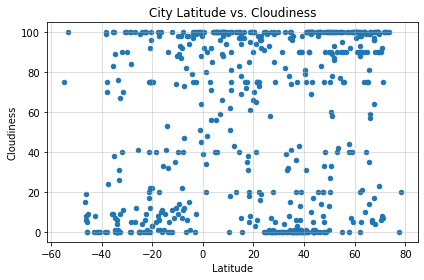

In [13]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Cloudiness',
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.tight_layout()
plt.savefig('images/lat_vs_Cloudiness.png')
plt.show()
#This plot shows how much cloud cover there is the more you go from 0 lat

## Latitude vs. Wind Speed Plot

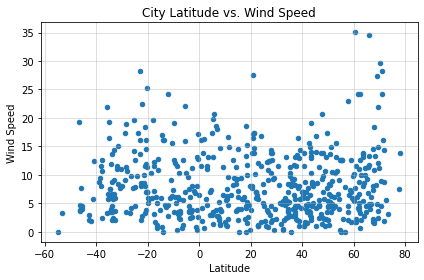

In [14]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Wind Speed',
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.tight_layout()
plt.savefig('images/lat_vs_Wind Speed.png')
plt.show()

## Linear Regression

In [20]:
northern_df = weather_data_df[weather_data_df['Lat']>=0]
southern_df = weather_data_df[weather_data_df['Lat']<0]

weather_data_df.describe()

,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,19.939468,20.917867,63.744834,70.628722,55.057793,7.976095
std,33.166772,90.579318,16.883258,21.142677,41.810875,5.743614
min,-54.800000,-175.200000,10.540000,1.000000,0.000000,0.000000
25%,-7.938500,-60.556050,52.340000,61.000000,7.000000,3.670000
50%,22.916700,27.430600,66.760000,77.000000,74.000000,6.580000
75%,47.566650,99.923550,77.710000,86.000000,99.000000,11.490000
max,78.218600,179.316700,94.330000,100.000000,100.000000,35.030000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6987


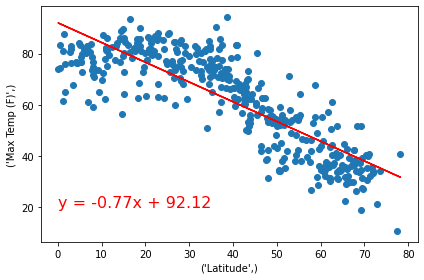

In [24]:
x_values = northern_df['Lat']
y_values = northern_df['Temp']
coord = (0,20)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_label='Latitude', 
y_label='Max Temp (F)', 
filename='northern_temp_vs_lat'
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {round(rvalue**2, 4)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.annotate(line_eq, coord, fontsize=16, color='r')
plt.tight_layout()
plt.savefig(f'images/{filename}.png')
plt.show()
#

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5859


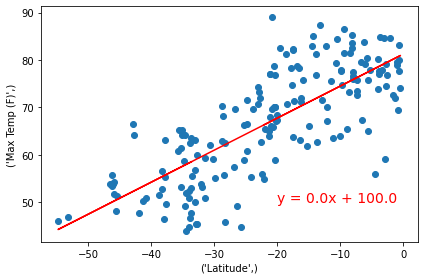

In [28]:
x_values = southern_df['Lat']
y_values = southern_df['Temp']
coord = (-20,50)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_label='Latitude', 
y_label='Max Temp (F)', 
filename='southern_temp_vs_lat'
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,-2)) + 'x + ' + str(round(intercept,-2))
print(f'The r-value is: {round(rvalue**2, 4)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.annotate(line_eq, coord, fontsize=14, color='r')
plt.tight_layout()
plt.savefig(f'images/{filename}.png')
plt.show()
# between the northern and southern charts, it does show a higher number of greater temerperatures than the north.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002


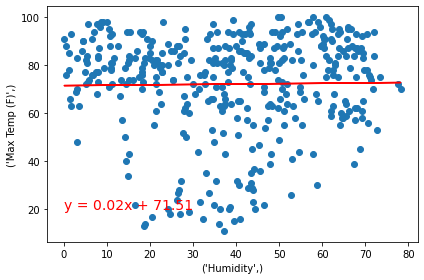

In [30]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
coord = (0,20)
x_label='Humidity', 
y_label='Max Temp (F)', 
filename='northern_humid_vs_lat'
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {round(rvalue**2, 4)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.annotate(line_eq, coord, fontsize=14, color='r')
plt.tight_layout()
plt.savefig(f'images/{filename}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0252


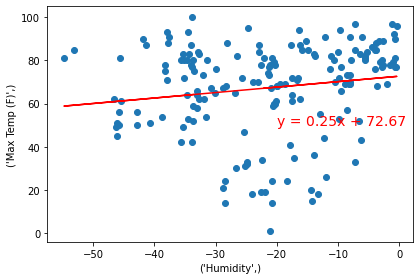

In [34]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
coord = (-20,50)
x_label='Humidity', 
y_label='Max Temp (F)', 
filename='southern_humid_vs_lat'
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {round(rvalue**2, 4)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.annotate(line_eq, coord, fontsize=14, color='r')
plt.tight_layout()
plt.savefig(f'images/{filename}.png')
plt.show()

#This map shows there seems to be a higher perentage of humidity than north

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0009


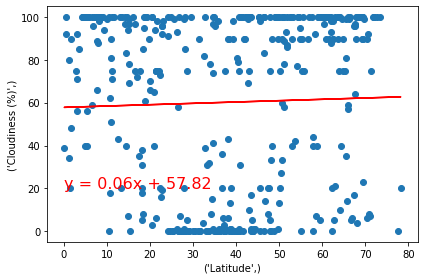

In [35]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
coord = (0,20)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_label='Latitude', 
y_label='Cloudiness (%)', 
filename='northern_cloud_vs_lat'
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {round(rvalue**2, 4)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.annotate(line_eq, coord, fontsize=16, color='r')
plt.tight_layout()
plt.savefig(f'images/{filename}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0876


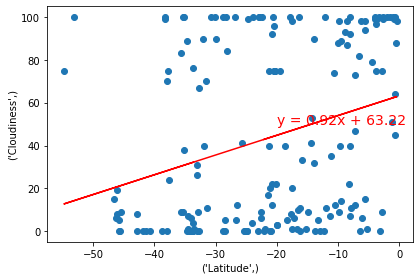

In [38]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
coord = (-20,50)
x_label='Latitude', 
y_label='Cloudiness', 
filename='southern_cloud_vs_lat'
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {round(rvalue**2, 4)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.annotate(line_eq, coord, fontsize=14, color='r')
plt.tight_layout()
plt.savefig(f'images/{filename}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.6987


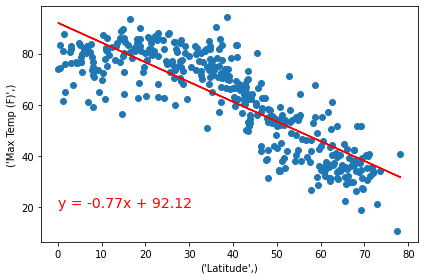

In [39]:
x_values = northern_df['Lat']
y_values = northern_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
coord = (0,20)
x_label='Latitude', 
y_label='Max Temp (F)', 
filename='northern_temp_vs_lat'
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {round(rvalue**2, 4)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.annotate(line_eq, coord, fontsize=14, color='r')
plt.tight_layout()
plt.savefig(f'images/{filename}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0006


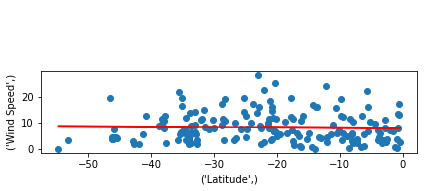

In [40]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
coord = (-20,50)
x_label='Latitude', 
y_label='Wind Speed', 
filename='southern_wind_vs_lat'
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {round(rvalue**2, 4)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.annotate(line_eq, coord, fontsize=14, color='r')
plt.tight_layout()
plt.savefig(f'images/{filename}.png')
plt.show()